In [1]:
import numpy as np

In [2]:
global_means = np.load("/nvme/zhangtianning/datasets/era5G32x64_set_before_normlization/global_means.npy")
global_stds = np.load("/nvme/zhangtianning/datasets/era5G32x64_set_before_normlization/global_stds.npy")

In [13]:
for flag in ['valid_data','test_data','train_data']:
    data = np.load(f"/nvme/zhangtianning/datasets/era5G32x64_set/era5G32x64_set/{flag}.npy")
    data = data*global_stds + global_means
    print(data.mean())
    data = data.astype('float32')
    print(data.mean())
    np.save(f"/nvme/zhangtianning/datasets/era5G32x64_set_before_normlization/{flag}.npy",data)

23317.11386573096
23317.621
23310.715473378536
23310.97
23299.7970203588
23298.262


In [9]:
data.mean()

-0.006104

### cache the mean_std infomation

In [4]:
import pickle
labels =[
        '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature', 'surface_pressure', 'mean_sea_level_pressure',
        '1000h_u_component_of_wind', '1000h_v_component_of_wind', '1000h_geopotential',
        '850h_temperature', '850h_u_component_of_wind', '850h_v_component_of_wind', '850h_geopotential', '850h_relative_humidity',
        '500h_temperature', '500h_u_component_of_wind', '500h_v_component_of_wind', '500h_geopotential', '500h_relative_humidity',
        '50h_geopotential',
        'total_column_water_vapour',

    ]

mean_std_pool = {}
for name in labels:
    with open(f"/nvme/zhangtianning/datasets/era5_mean_std/{name}.pkl",'rb') as f:
        mean_std_pool[name] = pickle.load(f)

import json

with open("/nvme/zhangtianning/datasets/era5_mean_std/mean_std_infomation.json",'w') as f:
    json.dump(mean_std_pool,f)

### load result

In [26]:
a = torch.ones(2,4)*1
b = torch.ones(2,4)*2
c = torch.ones(2,4)*3
d = torch.ones(2,4)*4

In [36]:
out = torch.cat([a,b,c,d]).reshape(4,2,4)

In [40]:
Field = torch.randn(10,2,3,4)
out = Field.flatten(0,1).reshape(Field.shape)

In [3]:
import os
import torch
import json
def load_fourcastresult(root_dir):
    #root_dir = "checkpoints/fourcastnet/fourcast-large/08_01_21_26"
    result_list=[]
    for file_name in os.listdir(root_dir):
        if "fourcastresult" not in file_name:continue
        result_list.append(torch.load(os.path.join(root_dir,file_name)))

    full_result={}
    for result in result_list:
        for key,val in result.items():
            #key = key.item()
            if key in full_result:
                print(f"repeat for key={key}")
            full_result[key]=val

    accu_list = [t['accu'] for t in full_result.values()]
    rmse_list = [t['rmse'] for t in full_result.values()]

    accu_list = torch.stack(accu_list)
    rmse_list = torch.stack(rmse_list)
    return accu_list,rmse_list

In [2]:
from mltool.visualization import *

In [4]:
with open("/nvme/zhangtianning/datasets/era5_mean_std/mean_std_infomation.json",'r') as f:
    mean_std_pool = json.load(f)

In [5]:
mean_std_pool

{'10m_u_component_of_wind': {'mean': -0.08244494681317033,
  'std': 5.522365507485557},
 '10m_v_component_of_wind': {'mean': 0.1878750926415015,
  'std': 4.753310696543225},
 '2m_temperature': {'mean': 278.45956231728695, 'std': 21.364880588971882},
 'surface_pressure': {'mean': 96659.29942439323, 'std': 9576.018310416932},
 'mean_sea_level_pressure': {'mean': 100967.95123832714,
  'std': 1317.7139732375715},
 '1000h_u_component_of_wind': {'mean': -0.07095991227445357,
  'std': 6.114047410072003},
 '1000h_v_component_of_wind': {'mean': 0.18681402351519094,
  'std': 5.2976192016365395},
 '1000h_geopotential': {'mean': 745.1660079545572, 'std': 1059.9845164332398},
 '850h_temperature': {'mean': 274.58180069739996, 'std': 15.676612264642246},
 '850h_u_component_of_wind': {'mean': 1.3814626339353238,
  'std': 8.15774947680599},
 '850h_v_component_of_wind': {'mean': 0.14620261110086222,
  'std': 6.264685056755958},
 '850h_geopotential': {'mean': 13758.085881283701, 'std': 1459.716048599048}

In [8]:
std_list = torch.Tensor([mean_std_pool[k]['std'] for k in labels])

In [10]:
accu_list_after_finetune,rmse_list_after_finetune = load_fourcastresult("checkpoints/fourcastnet/fourcast-large/08_02_12_08")
accu_list_after_pretrain,rmse_list_after_pretrain = load_fourcastresult("checkpoints/fourcastnet/fourcast-large/08_02_12_28")
rmse_list_after_finetune*= std_list
rmse_list_after_pretrain*= std_list 

repeat for key=4
repeat for key=3
repeat for key=2
repeat for key=6
repeat for key=5
repeat for key=1
repeat for key=0
repeat for key=3
repeat for key=2
repeat for key=6
repeat for key=1
repeat for key=0
repeat for key=5
repeat for key=4


In [40]:
accu_list_after_finetune_s,rmse_list_after_finetune_s = load_fourcastresult("checkpoints/fourcastnet/fourcast-small/08_02_16_14")
rmse_list_after_finetune_s*= std_list
# accu_list_after_pretrain_s,rmse_list_after_pretrain_s = load_fourcastresult("checkpoints/fourcastnet/fourcast-small/08_02_16_19")
# rmse_list_after_pretrain_s*= std_list 
accu_list_after_pretrain_s,rmse_list_after_pretrain_s = load_fourcastresult("checkpoints/fourcastnet/fourcast-small/08_03_10_57")
rmse_list_after_pretrain_s*= std_list 


repeat for key=5
repeat for key=2
repeat for key=4
repeat for key=3
repeat for key=1
repeat for key=0
repeat for key=6
repeat for key=1
repeat for key=0
repeat for key=4
repeat for key=3
repeat for key=2
repeat for key=6
repeat for key=5


In [42]:
import pandas as pd

In [48]:
data  = rmse_list_after_finetune.mean(0)
dfpd.DataFrame(data[[2,10,18]].transpose(1,0),index=labels,columns=['day1','day3','day5']) 

,day1,day3,day5
10m_u_component_of_wind,0.964687,2.200594,3.411051
10m_v_component_of_wind,0.991615,2.260656,3.505010
2m_temperature,1.032899,1.508937,2.092084
surface_pressure,331.235229,479.070007,690.860596
mean_sea_level_pressure,75.959656,243.852921,465.468994
1000h_u_component_of_wind,1.069449,2.431975,3.787273
1000h_v_component_of_wind,1.099852,2.511867,3.921715
1000h_geopotential,60.286880,193.438568,367.798615
850h_temperature,0.835352,1.586873,2.506969
850h_u_component_of_wind,1.478283,3.204611,4.875833


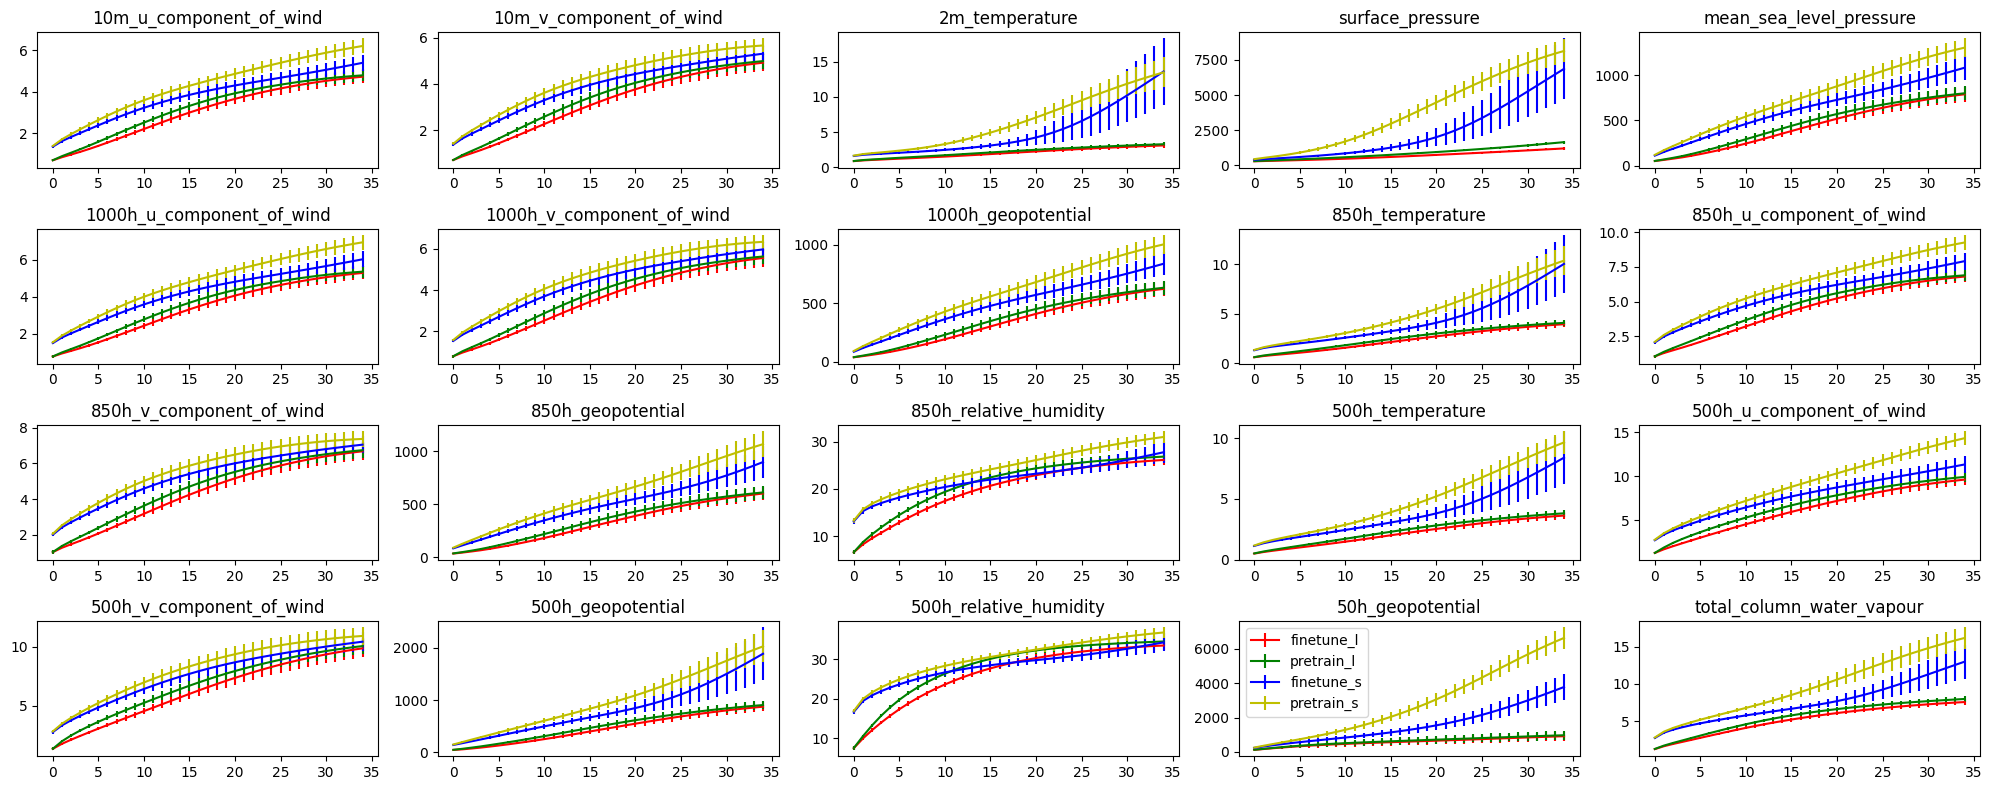

In [50]:
%matplotlib inline
color_list=['r','g','b','y']
tag_list=['finetune_l','pretrain_l','finetune_s','pretrain_s']
with plt.style.context('no-latex','ieee'):
    fig, axs = plt.subplots(4, 5,figsize=(20,8))
    axs = axs.flatten()
    
    for i ,(ax,label) in enumerate(zip(axs,labels)):
        ax.set_title(label)
    
        for j,data in enumerate([rmse_list_after_finetune[...,i],
                                 rmse_list_after_pretrain[...,i],
                                 rmse_list_after_finetune_s[...,i],
                                 rmse_list_after_pretrain_s[...,i]]
                               ):
            mean = data.mean(0)
            var  = err = data.std(0)
            ku   = ((data1 - mean) ** 4).mean(0) / (var**2+0.01) #计算峰度
            x_axis = np.arange(len(mean))
            ax.errorbar(x_axis, mean, yerr = err,alpha=1,color=color_list[j],label=tag_list[j])
            #ax.plot(x_axis, mean, linewidth=1,color_list[j],label=tag_list[j])
        if i==18:ax.legend()
#         #ax.set_xticks(range(36),[f"{6*i:03d}" for i in range(36)],rotation=90)
#         mean = data2.mean(0)
#         var  = err = data2.std(0)
#         ku   = ((data1 - mean) ** 4).mean(0) / (var**2+0.01) #计算峰度
#         x_axis = np.arange(len(mean))
#         ax.errorbar(x_axis, mean, yerr = err,alpha=0.3,color='b')
#         ax.plot(x_axis, mean, linewidth=1,color='b')
#         ax.set_title(label)
        #ax.set_ylim([0,0.003])
    fig.tight_layout()

In [51]:
fig.savefig("img/rmse_all.png",bbox_inches='tight', dpi=200)

In [42]:

#     mean = data2.mean(0)
#     var  = err = data2.var(0)
#     ku   = ((data2 - mean) ** 4).mean(0) / (var**2+0.01) #计算峰度
#     x_axis = np.arange(len(mean))
#     ax.errorbar(x_axis, mean, yerr = err,alpha=0.3,color='b')
#     ax.plot(x_axis, mean, linewidth=1,color='b',label=label)
#with plt.style.context('no-latex','ieee'):

#_=plt.xticks(range(36),[f"{6*i:03d}" for i in range(36)],rotation=90)

In [16]:
accu_list.shape

torch.Size([1425, 35, 20])

# Create data

In [1]:
# %load train/pretrain.py

import os, sys,time
sys.path.append(os.getcwd())
os.environ["CUDA_VISIBLE_DEVICES"] = "6"
idx=0
sys.path = [p for p in sys.path if 'lustre' not in p]
force_big  = True
accumulation_steps_global=8
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data.distributed import DistributedSampler
from functools import partial
from torch.nn.parallel import DistributedDataParallel
import timm.optim
from timm.scheduler import create_scheduler
#import hfai
#hfai.set_watchdog_time(21600)
#import hfai.nccl.distributed as dist
import torch.distributed as dist
# from hfai.nn.parallel import DistributedDataParallel
#from ffrecord.torch import DataLoader
#import hfai.nn as hfnn
#from hfai.datasets import ERA5
from model.afnonet import AFNONet
from model.physics_model import EulerEquationModel
from utils.params import get_args
from utils.tools import getModelSize, load_model, save_model
from utils.eval import single_step_evaluate
import pandas as pd

from mltool.dataaccelerate import DataLoaderX,DataLoader,DataPrefetcher,DataSimfetcher
from mltool.loggingsystem import LoggingSystem


save_intervel=100
from cephdataset import (ERA5CephDataset,ERA5CephSmallDataset,SpeedTestDataset,load_test_dataset_in_memory,
                         load_small_dataset_in_memory,ERA5CephInMemoryDataset,mean_std_ERA5_20)
#dataset_type = ERA5CephDataset
# dataset_type  = SpeedTestDataset

def find_free_port():
    import socket
    s = socket.socket()
    s.bind(('', 0))            # Bind to a free port provided by the host.
    return s.getsockname()[1]  # Return the port number assigned.



lr_for_mode={
    'pretrain':5e-4,
    'finetune':1e-4
}
ep_for_mode={
    'pretrain':80,
    'finetune':50
}
bs_for_mode={
    'pretrain':4,
    'finetune':3
}
as_for_mode={
    'pretrain':8,
    'finetune':16
}
train_set={
    'large': (720, 1440, 8, ERA5CephDataset),
    'small': ( 32,   64, 8, ERA5CephSmallDataset),
    'test_large': (720, 1440, 8, lambda **kargs:SpeedTestDataset(720,1440,**kargs)),
    'test_small': ( 32,   64, 8, lambda **kargs:SpeedTestDataset( 32,  64,**kargs)),
    'physics_small': ( 32,   64, 2, ERA5CephSmallDataset),
    'physics': (720, 1440, 8, ERA5CephDataset),
}

half_model = False
last_best_path=None


def compute_accu(ltmsv_pred, ltmsv_true):
    w = ltmsv_pred.shape[1]
    latitude = torch.linspace(-np.pi/2,np.pi/2,w).to(ltmsv_pred.device)
    cos_lat  = torch.cos(latitude)
    latweight= cos_lat/cos_lat.mean()
    latweight = latweight.reshape(1, w, 1,1)
    # history_record <-- (B, w,h, property)
    fenzi = (latweight*ltmsv_pred*ltmsv_true).sum(dim=(1, 2))
    fenmu = torch.sqrt((latweight*ltmsv_pred**2).sum(dim=(1,2)) *
                       (latweight*ltmsv_true**2).sum(dim=(1, 2))
                       )
    return torch.clamp(fenzi/(fenmu+1e-10),0,10)

def compute_rmse(pred, true):
    # pred <-- (B,w,h,p)
    # true <-- (B,w,h,p)
    w         = pred.shape[1]
    latitude  = torch.linspace(-np.pi/2, np.pi/2, w).to(pred.device)
    cos_lat   = torch.cos(latitude)
    latweight = cos_lat/cos_lat.mean()
    latweight = latweight.reshape(1, w, 1,1)
    return  torch.clamp(torch.sqrt((latweight*(pred - true)**2).mean(dim=(1,2) )),0,1000)

intervel=10
def train_one_epoch(epoch, start_step, model, criterion, data_loader, optimizer, loss_scaler, lr_scheduler, min_loss,logsys):
    model.train()
    logsys.train()

    accumulation_steps = accumulation_steps_global # should be 16 for finetune. but I think its ok.
    half_model = next(model.parameters()).dtype == torch.float16
    now = time.time()
    data_cost = train_cost = rest_cost = 0

    Fethcher   = DataSimfetcher
    device     = next(model.parameters()).device
    prefetcher = Fethcher(data_loader,device)
    batches    = len(data_loader)
    inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
    gpu        = dist.get_rank() if hasattr(model,'module') else 0
    inter_b.lwrite("load everything, start_training......", end="\r")
    if start_step == 0:optimizer.zero_grad()
    while inter_b.update_step():
        #if inter_b.now>10:break
        step = inter_b.now
        batch = prefetcher.next()
        if step < start_step:continue

        data_cost += time.time() - now;now = time.time()

        batch = [x.half() if half_model else x.float() for x in batch]
        batch = [x.to(device).transpose(3, 2).transpose(2, 1) for x in batch]
        loss = 0
        with torch.cuda.amp.autocast():
            out = batch[0]
            for i in range(1,len(batch)):
                out   = model(out)
                extra_loss = 0
                if isinstance(out,(list,tuple)):
                    extra_loss=out[1]
                    if (step+1) % intervel==0:logsys.record(f'train_extra_loss_gpu{gpu}_timestep{i}', extra_loss.item(), epoch*batches + step)
                    for extra_info_from_model in out[2:]:
                        for name, value in extra_info_from_model.items():
                            if (step+1) % intervel==0:logsys.record(f'train_{name}_timestep{i}', value, epoch*batches + step)
                    out = out[0]
                abs_loss = criterion(out, batch[i])
                if (step+1) % intervel==0:logsys.record(f'train_abs_loss_gpu{gpu}_timestep{i}', abs_loss.item(), epoch*batches + step)
                loss +=  abs_loss + extra_loss
            loss /= accumulation_steps
        loss_scaler.scale(loss).backward()

        train_cost += time.time() - now;now = time.time()
        if (step+1) % intervel==0:logsys.record(f'train_loss_gpu{gpu}', loss.item(), epoch*batches + step)
        # 梯度累积
        if (step+1) % accumulation_steps == 0:
           #if half_model:
            loss_scaler.step(optimizer)
            loss_scaler.update()
            optimizer.zero_grad()
            # else:
            #     optimizer.step()
            #     optimizer.zero_grad()

        # if (step+1) % save_intervel == 0:
        #     #if dist.get_rank() == 0 and hfai.receive_suspend_command():
        #     if hasattr(model,'module'):
        #         if gpu==0:
        #             save_model(model, epoch, step+1, optimizer, lr_scheduler, loss_scaler, min_loss, SAVE_PATH/'pretrain_latest.pt')
        #         #time.sleep(5)
        #     #hfai.go_suspend()
        #     else:
        #         save_model(model, epoch, step+1, optimizer, lr_scheduler, loss_scaler, min_loss, SAVE_PATH/'pretrain_latest.pt')

        rest_cost += time.time() - now;now = time.time()
        
        if (step+1) % intervel==0 or step==0:
            outstring=(f"epoch:{epoch:03d} iter:[{step:5d}]/[{len(data_loader)}] GPU:[{gpu}] abs_loss:{abs_loss.item():.2f} loss:{loss.item():.2f} cost:[Date]:{data_cost/intervel:.1e} [Train]:{train_cost/intervel:.1e} [Rest]:{rest_cost/intervel:.1e}")
            data_cost = train_cost = rest_cost = 0
            inter_b.lwrite(outstring, end="\r")

def single_step_evaluate(data_loader, model, criterion,epoch,logsys,status='valid'):
    loss, total = torch.zeros(2).cuda()
    gpu     = dist.get_rank() if hasattr(model,'module') else 0
    # switch to evaluation mode
    model.eval()
    logsys.eval()
    Fethcher   = DataSimfetcher
    device     = next(model.parameters()).device
    prefetcher = Fethcher(data_loader,next(model.parameters()).device)
    batches    = len(data_loader)
    inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
    half_model = next(model.parameters()).dtype == torch.float16

    data_cost = train_cost = rest_cost = 0
    now = time.time()

    with torch.no_grad():
        inter_b.lwrite("load everything, start_validating......", end="\r")
        while inter_b.update_step():
            #if inter_b.now>10:break
            data_cost += time.time() - now;now = time.time()
            step = inter_b.now
            batch = prefetcher.next()
            batch = [x.half() if half_model else x.float() for x in batch]
            batch = [x.to(device).transpose(3, 2).transpose(2, 1) for x in batch]#(B, W, H, P ) -> (B, P, W, H ) 
            with torch.cuda.amp.autocast():
                out = batch[0]
                for i in range(1,len(batch)):
                    out   = model(out)
                    extra_loss = 0
                    if isinstance(out,(list,tuple)):
                        extra_loss=out[1]
                        if (step+1) % intervel==0:logsys.record(f'valid_on_{status}_extra_loss_gpu{gpu}_timestep{i}', extra_loss.item(), epoch*batches + step)
                        for extra_info_from_model in out[2:]:
                            for name, value in extra_info_from_model.items():
                                logsys.record(f'valid_on_{status}_{name}_timestep{i}', value, epoch*batches + step)
                        out = out[0]
                    abs_loss = criterion(out, batch[i])
                    if (step+1) % intervel==0:logsys.record(f'valid_on_{status}_abs_loss_gpu{gpu}_timestep{i}', abs_loss.item(), epoch*batches + step)
                    loss +=  abs_loss/(len(batch)-1)## + extra_loss no need for valid
            train_cost += time.time() - now;now = time.time()
            #total += 1
            total += len(batch) - 1
            rest_cost += time.time() - now;now = time.time()
            if (step+1) % intervel==0 or step==0:
                outstring=(f"epoch:valid iter:[{step:5d}]/[{len(data_loader)}] GPU:[{gpu}] abs_loss:{abs_loss.item():.2f} loss:{loss.item():.2f} cost:[Date]:{data_cost/intervel:.1e} [Train]:{train_cost/intervel:.1e} [Rest]:{rest_cost/intervel:.1e}")
                inter_b.lwrite(outstring, end="\r")


        if hasattr(model,'module'):
            for x in [loss, total]:
                dist.barrier()
                dist.reduce(x, 0)

        if hasattr(model,'module'):
            loss_val = 0
            if dist.get_rank() == 0:
                loss_val = loss.item() / total.item()
            return loss_val
        else:
            return loss.item() / total.item()

def fourcast_step(data_loader, model,logsys,random_repeat = 0):
    model.eval()
    logsys.eval()
    status     = 'test'
    gpu        = dist.get_rank() if hasattr(model,'module') else 0
    Fethcher   = DataSimfetcher
    prefetcher = Fethcher(data_loader,next(model.parameters()).device)
    batches = len(data_loader)
    inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
    device = next(model.parameters()).device
    data_cost = train_cost = rest_cost = 0
    now = time.time()

    fourcastresult={}
    with torch.no_grad():
        inter_b.lwrite("load everything, start_validating......", end="\r")
        while inter_b.update_step():
            #if inter_b.now>10:break
            data_cost += time.time() - now;now = time.time()
            step = inter_b.now
            idxes,batch = prefetcher.next()
            batch = [x.half() if half_model else x.float() for x in batch]
            batch = [x.to(device) for x in batch]
            channel_last = batch[0].shape[1]!=20 or batch[0].shape[1]!=12
            if channel_last:
                batch = [x.permute(0,3,1,2) for x in batch]# (B, P, W, H ) 

            history_sum_true = history_sum_pred = batch[0].permute(0,2,3,1) if batch[0].shape[1]!=20 or batch[0].shape[1]!=12 else batch[0]
            # first sum should be (B, P, W, H ) 
            accu_series=[]
            rmse_series=[]
            out = batch[0]
            extra_info = {}
            for i in range(1,len(batch)):
                out   = model(out)
                extra_loss = 0
                if isinstance(out,(list,tuple)):
                    extra_loss=out[1]
                    for extra_info_from_model in out[2:]:
                        for key, val in extra_info_from_model.items():
                            if i not in extra_info:extra_info[i] = {}
                            if key not in extra_info[i]:extra_info[i][key] = []
                            extra_info[i][key].append(val)
                    out = out[0]
                ltmv_pred = out.permute(0,2,3,1)# (B, P, W, H ) -> # (B, W, H, P) 
                ltmv_true = batch[i].permute(0,2,3,1)# (B, P, W, H ) -> # (B, W, H, P) 
                history_sum_pred+=ltmv_pred
                history_sum_true+=ltmv_true
                history_mean_pred=history_sum_pred/(i+1)
                history_mean_true=history_sum_true/(i+1)
                ltmsv_pred = ltmv_pred - history_mean_pred
                ltmsv_true = ltmv_true - history_mean_true
                accu_series.append(compute_accu(ltmsv_pred, ltmsv_true).detach().cpu())
                rmse_series.append(compute_rmse(ltmv_pred , ltmv_true ).detach().cpu())
            accu_series = torch.stack(accu_series,1) # (B,fourcast_num,20)
            rmse_series = torch.stack(rmse_series,1) # (B,fourcast_num,20)
            for idx, accu,rmse in zip(idxes,accu_series,rmse_series):
                #if idx in fourcastresult:logsys.info(f"repeat at idx={idx}")
                fourcastresult[idx.item()] = {'accu':accu,"rmse":rmse}
        for idx, val_pool in extra_info.items():
            for key, val in val_pool.items():
                logsys.record(f'test_{key}_each_fourcast_step', np.mean(val), idx)

            train_cost += time.time() - now;now = time.time()
            for _ in range(random_repeat):
                out = batch[0]*(1 + torch.randn_like(batch[0])*0.05)
                for i in range(1,len(batch)):
                    out   = model(out)
                    ltmv_pred = out.permute(0,2,3,1)
                    ltmv_true = batch[i].permute(0,2,3,1)
                    history_sum_pred+=ltmv_pred
                    history_sum_true+=ltmv_true
                    history_mean_pred=history_sum_pred/(i+1)
                    history_mean_true=history_sum_true/(i+1)
                    ltmsv_pred = ltmv_pred - history_mean_pred
                    ltmsv_true = ltmv_true - history_mean_true
                    accu_series.append(compute_accu(ltmsv_pred, ltmsv_true).detach().cpu())
                    rmse_series.append(compute_rmse(ltmv_pred , ltmv_true ).detach().cpu())
                accu_series = torch.stack(accu_series,1) # (B,fourcast_num,20)
                rmse_series = torch.stack(rmse_series,1) # (B,fourcast_num,20)
                for idx, accu,rmse in zip(idxes,accu_series,rmse_series):
                    if 'random' in fourcastresult[idx.item()]:fourcastresult[idx.item()]['random']={'accu':[],"rmse":[]}
                    fourcastresult[idx.item()]['random']['accu'].append(accu)
                    fourcastresult[idx.item()]['random']['rmse'].append(rmse)
            rest_cost += time.time() - now;now = time.time()
            intervel=10
            if (step+1) % intervel==0 or step==0:
                outstring=(f"epoch:valid iter:[{step:5d}]/[{len(data_loader)}] GPU:[{gpu}] cost:[Date]:{data_cost/intervel:.1e} [Train]:{train_cost/intervel:.1e} [Rest]:{rest_cost/intervel:.1e}")
                inter_b.lwrite(outstring, end="\r")
    return fourcastresult

def get_train_and_valid_dataset(args,train_dataset_tensor=None,valid_dataset_tensor=None):
    train_dataset = args.dataset_type(split="train", mode=args.mode, check_data=True,dataset_tensor=train_dataset_tensor,
                                enable_physics_dataset=args.activate_physics_dataset)
    val_dataset   = args.dataset_type(split="valid", mode=args.mode, check_data=True,dataset_tensor=valid_dataset_tensor,
                                enable_physics_dataset=args.activate_physics_dataset)
    train_datasampler = DistributedSampler(train_dataset, shuffle=True) if args.distributed else None
    val_datasampler   = DistributedSampler(val_dataset,   shuffle=False) if args.distributed else None
    train_dataloader  = DataLoader(train_dataset, args.batch_size,   sampler=train_datasampler, num_workers=8, pin_memory=True, drop_last=True)
    val_dataloader    = DataLoader(val_dataset  , args.batch_size*8, sampler=val_datasampler,   num_workers=8, pin_memory=True, drop_last=False)
    return   train_dataset,   val_dataset, train_dataloader, val_dataloader

def get_test_dataset(args,train_dataset_tensor=None):
    if 'small' not in args.train_set:
        dataset_type  = ERA5CephInMemoryDataset
        test_dataset  = dataset_type(split="test" , mode=args.mode,years=[2018],root="datasets/era5G32x64_new",
                                        check_data=True,
                                        dataset_tensor=train_dataset_tensor,
                                        with_idx=True,
                                        time_step=3*24//6,enable_physics_dataset=args.activate_physics_dataset)
    else:
        test_dataset = args.dataset_type(split="test", mode=args.mode, check_data=True,dataset_tensor=train_dataset_tensor,
                                        time_step=3*24//6,with_idx=True,enable_physics_dataset=args.activate_physics_dataset)
    test_datasampler  = DistributedSampler(test_dataset,  shuffle=False) if args.distributed else None
    test_dataloader   = DataLoader(test_dataset, args.batch_size, sampler=test_datasampler, num_workers=8, pin_memory=False)
    return   test_dataset,   test_dataloader

def run_fourcast(args, model,logsys):
    import warnings
    warnings.filterwarnings("ignore")

    test_dataset,  test_dataloader = get_test_dataset(args)
    logsys.info(f"use dataset ==> {test_dataset.__class__.__name__}")
    logsys.info("starting fourcast~!")
    with open(os.path.join(logsys.ckpt_root,'weight_path'),'w') as f:
        f.write(args.pretrain_weight)
    fourcastresult = fourcast_step(test_dataloader, model,logsys,random_repeat = args.fourcast_randn_initial)
    gpu       = dist.get_rank() if hasattr(model,'module') else 0
    save_path = os.path.join(logsys.ckpt_root,f"fourcastresult.gpu_{gpu}")
    torch.save(fourcastresult,save_path)
    logsys.info(f"save fourcastresult at {save_path}")

    if not args.distributed:
        
        accu_list = torch.stack([p['accu'] for p in fourcastresult.values()]).mean(0)# (fourcast_num,property_num)
        rmse_list = torch.stack([p['rmse'] for p in fourcastresult.values()]).mean(0)# (fourcast_num,property_num)
        unit_list = torch.Tensor([mean_std_ERA5_20[name]['std'] for name in test_dataset.vnames]).to(rmse_list.device)
        unit_list = unit_list.reshape(1,len(test_dataset.vnames))# (1,property_num)

        accu_table= pd.DataFrame(accu_list.transpose(1,0),index=test_dataset.vnames)
        rmse_table= pd.DataFrame(rmse_list.transpose(1,0),index=test_dataset.vnames)
        rmse_table_unit = pd.DataFrame((rmse_list*unit_list).transpose(1,0),index=test_dataset.vnames)
        logsys.info("===>accu_table<===")
        logsys.info(accu_table);accu_table.to_csv(os.path.join(logsys.ckpt_root,'accu_table'))
        logsys.info("===>rmse_table<===")
        logsys.info(rmse_table);rmse_table.to_csv(os.path.join(logsys.ckpt_root,'rmse_table'))
        logsys.info("===>rmse_unit_table<===")
        logsys.info(rmse_table_unit);rmse_table_unit.to_csv(os.path.join(logsys.ckpt_root,'rmse_table_unit'))
        for predict_time in range(len(accu_list)):
            accu_table = accu_list[predict_time]
            rmse_table = rmse_list[predict_time]
            for name,accu,rmse in zip(test_dataset.vnames,accu_table,rmse_table):
                logsys.record(f'test_accu_{name}', accu.item(), predict_time)
                logsys.record(f'test_rmse_{name}', rmse.item(), predict_time)
                logsys.record(f'test_rmse_unit_{name}', rmse*mean_std_ERA5_20[name]['std'], predict_time)
    return 1

In [2]:
#set up
args = get_args(args=[])
local_rank=0
ngpus_per_node = 1
args.train_set="physics_small"
args.fourcast=True
args.batch_size=64
args.pretrain_weight = "checkpoints/physicsnet/pretrain-physics_small/08_14_13_30_07/backbone.best.pt"
args.patch_size      = int(2)
args.activate_physics_model =  True
args.world_size = -1
args.dist_file  = None
args.rank       = 0
args.dist_backend = "nccl"
args.multiprocessing_distributed = False
args.distributed = False
TIME_NOW  = time.strftime("%m_%d_%H_%M") if args.distributed else time.strftime("%m_%d_%H_%M_%S")
TIME_NOW  = f"{TIME_NOW}-seed_{args.seed}"
if not hasattr(args,'train_set'):args.train_set='large'
#TIME_NOW = "07_23_19_35_04"
name = args.mode if not args.fourcast else 'fourcast'
args.activate_physics_dataset = 'physics' in args.train_set
if args.fourcast:
    assert os.path.exists(args.pretrain_weight)
    args.mode = "finetune"
    SAVE_PATH = Path(os.path.dirname(args.pretrain_weight))
else:    
    datasetname= "ERA5_20-12" if args.activate_physics_dataset else "ERA5_20"
    modelsname= "fourcastnet" if not args.activate_physics_model else "physicsnet"
    TIME_NOW+=f"-{args.seed}"
    SAVE_PATH = Path(f'./checkpoints/{datasetname}/{modelsname}/{name}-{args.train_set}/{TIME_NOW}')
    SAVE_PATH.mkdir(parents=True, exist_ok=True)

args.gpu = gpu = local_rank
args.half_model = half_model
args.batch_size = bs_for_mode[args.mode] if args.batch_size == -1 else args.batch_size
#args.batch_size = 1 if force_big else 1
ngpus = torch.cuda.device_count()
args.epochs = ep_for_mode[args.mode] if args.epochs == -1 else args.epochs
args.lr     = lr_for_mode[args.mode] if args.lr == -1 else args.lr
# input size
h, w, patch_size,dataset_type = train_set[args.train_set]
args.dataset_type = dataset_type
patch_size = patch_size if args.patch_size == -1 else args.patch_size
print(patch_size)
x_c, y_c = 20, 20

if args.activate_physics_dataset:
    x_c, y_c = 12, 12
if args.activate_physics_model:
    y_c  = 15

logsys   = LoggingSystem(local_rank==0 or not args.distributed,SAVE_PATH,seed=args.seed)
_        = logsys.create_recorder(hparam_dict={'patch_size':patch_size, 'lr':args.lr, 'batch_size':args.batch_size,
                                               'physics_model':args.activate_physics_model},
                                  metric_dict={'best_loss':None})
# fix the seed for reproducibility
torch.manual_seed(args.seed)
np.random.seed(args.seed)
#cudnn.benchmark = True
if args.distributed:
    if args.dist_url == "env://" and args.rank == -1:
        args.rank = int(os.environ["RANK"])
    if args.multiprocessing_distributed:
        # For multiprocessing distributed training, rank needs to be the
        # global rank among all the processes
        args.rank = args.rank * ngpus_per_node + local_rank
    logsys.info(f"start init_process_group,backend={args.dist_backend}, init_method={args.dist_url},world_size={args.world_size}, rank={args.rank}")
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,world_size=args.world_size, rank=args.rank)


# ==============> Initial Model <=============
if args.distributed or force_big:
    model = AFNONet(img_size=[h, w], patch_size=patch_size, in_chans=x_c, out_chans=y_c, norm_layer=partial(nn.LayerNorm, eps=1e-6),
                    fno_blocks=args.fno_blocks,
                    double_skip=args.double_skip, fno_bias=args.fno_bias, fno_softshrink=args.fno_softshrink,
                    )
else:
    model = AFNONet(img_size=[h, w], patch_size=patch_size, in_chans=x_c, out_chans=y_c, norm_layer=partial(nn.LayerNorm, eps=1e-6),
                    fno_blocks=args.fno_blocks,
                    double_skip=args.double_skip, fno_bias=args.fno_bias, fno_softshrink=args.fno_softshrink,
                    embed_dim=16, depth=1,debug_mode=1
                    )
if args.activate_physics_model:
    model = EulerEquationModel(args,model)
#model = hfnn.to_hfai(model)
logsys.info(f"use model ==> {model.__class__.__name__}")

rank = args.rank
if local_rank == 0:
    param_sum, buffer_sum, all_size = getModelSize(model)
    logsys.info(f"Rank: {args.rank}, Local_rank: {local_rank} | Number of Parameters: {param_sum}, Number of Buffers: {buffer_sum}, Size of Model: {all_size:.4f} MB\n")
if args.distributed:
    # For multiprocessing distributed, DistributedDataParallel constructor
    # should always set the single device scope, otherwise,
    # DistributedDataParallel will use all available devices.
    torch.cuda.set_device(args.gpu)
    model.cuda(args.gpu)
    model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[args.gpu])
else:
    model = model.cuda()
if args.half_model:
    model = model.half()
# args.lr = args.lr * args.batch_size * dist.get_world_size() / 512.0
param_groups    = timm.optim.optim_factory.add_weight_decay(model, args.weight_decay)
optimizer       = torch.optim.AdamW(param_groups, lr=args.lr, betas=(0.9, 0.95))
loss_scaler     = torch.cuda.amp.GradScaler(enabled=True)
lr_scheduler, _ = create_scheduler(args, optimizer)
criterion       = nn.MSELoss()

if args.mode == 'pretrain':
    start_epoch, start_step, min_loss = load_model(model.module if args.distributed else model,
                                    optimizer, lr_scheduler, loss_scaler,
                                    SAVE_PATH/'pretrain_latest.pt',loc = 'cuda:{}'.format(args.gpu))
else:
    if (SAVE_PATH / 'finetune_latest.pt').exists():
        start_epoch, start_step, min_loss = load_model(model.module if args.distributed else model, optimizer, lr_scheduler, loss_scaler, SAVE_PATH / 'finetune_latest.pt')
    else:
        assert args.pretrain_weight != ""
        assert os.path.exists(args.pretrain_weight)
        logsys.info(f"loading weight from {args.pretrain_weight}")
        start_epoch, start_step, min_loss = load_model(model.module if args.distributed else model, path=args.pretrain_weight, only_model=True)
        logsys.info("done!")

2
log at checkpoints/physicsnet/pretrain-physics_small/08_14_13_30_07


2022-08-17 11:16:48,330 use model ==> EulerEquationModel
2022-08-17 11:16:48,332 Rank: 0, Local_rank: 0 | Number of Parameters: 37724828, Number of Buffers: 0, Size of Model: 143.9088 MB

2022-08-17 11:16:49,349 loading weight from checkpoints/physicsnet/pretrain-physics_small/08_14_13_30_07/backbone.best.pt
2022-08-17 11:16:49,466 done!


loading model from checkpoints/physicsnet/pretrain-physics_small/08_14_13_30_07/backbone.best.pt...........
loading model success...........


In [3]:
test_dataset,  test_dataloader = get_test_dataset(args)
logsys.info(f"use dataset ==> {test_dataset.__class__.__name__}")
logsys.info("starting fourcast~!")
master_bar        = logsys.create_master_bar(1)
last_best_path = None

2022-08-17 11:16:50,915 use dataset ==> ERA5CephSmallDataset
2022-08-17 11:16:50,916 starting fourcast~!


In [4]:
data_loader = test_dataloader
model.eval()
logsys.eval()
device = next(model.parameters()).device

In [5]:
idxes,batch = next(iter(data_loader))

In [6]:
batch = [x.half() if half_model else x.float() for x in batch]
batch = [x.to(device) for x in batch]
channel_last = batch[0].shape[1]!=20 or batch[0].shape[1]!=12
if channel_last:batch = [x.permute(0,3,1,2) for x in batch]# (B, P, W, H ) 

In [7]:
import torch,time
import torch.nn as nn
import torch.nn.functional as F
import torch

In [8]:
def f(x):
    return f"mean:{(x**2).mean().item():.3f}, max:{x.max().item():.3f}, min:{x.min().item():.3f}, std:{x.std().item():.3f}"

In [82]:
batch[0][:1,:2].shape

torch.Size([1, 2, 32, 64])

In [86]:
u.shape

torch.Size([1, 1, 32, 64])

In [ ]:
def plot(u,v):
    fig, axs = plt.subplots(2, 3,figsize=(20,8))
    axs[0][0].imshow(u[0,0,0].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[0][1].imshow(u[0,0,1].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[0][2].imshow(u[0,0,2].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][0].imshow(v[0,0,0].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][1].imshow(v[0,0,1].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][2].imshow(v[0,0,2].cpu().detach().numpy(),vmin=0,vmax=10)
    for ax in axs.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [89]:
batch[0][:1].reshape(1, 4, 3, 32, 64).shape

torch.Size([1, 4, 3, 32, 64])

In [94]:
Field.shape

torch.Size([1, 2, 1, 32, 64])

In [96]:
u.shape

torch.Size([1, 1, 3, 32, 64])

In [2]:
from model.physics_model import *

In [108]:
model.Dx= First_Derivative_Layer(position=-1, dim=3, mode='three-point-stencil').cuda()
model.Dy= First_Derivative_Layer(position=-2, dim=3, mode='three-point-stencil').cuda()

In [145]:
initial_state = torch.randn(32)[None,None]
initial_state.shape

torch.Size([1, 1, 32])

In [146]:
F.pad(initial_state, (1,1), mode='circular')

tensor([[[-0.4993, -0.5832, -2.1924,  0.7425,  0.0205, -1.3183,  2.0302,
           0.5347, -0.2037, -0.4766,  2.1621, -2.5544,  2.3935, -0.4508,
          -1.6874,  1.5373, -0.2024, -0.0074,  1.1072, -0.4857, -1.1023,
           1.0699, -1.0872, -0.5974,  1.2904,  1.5299, -0.7017, -0.4258,
          -0.2384, -0.5119,  0.7276, -0.0264, -0.4993, -0.5832]]])

In [17]:
import numpy as np

In [9]:
s=" ";d=""

In [19]:
kernel = torch.Tensor([-1/4,0,1/4])[None][None]
state = initial_state = torch.randn(5)[None,None]
for j in range(120):
    state = F.conv1d(F.pad(state, (1,1), mode='circular'),kernel)
    print(f"{j:03d}" + " ".join([f"{s if t>=0 else d} {t:.3e}" for t in state[0,0].numpy()]))

000 -5.896e-01   7.536e-01   8.204e-01   3.702e-02  -1.021e+00
001  4.438e-01   3.525e-01  -1.792e-01  -4.605e-01  -1.566e-01
002  1.273e-01  -1.557e-01  -2.032e-01   5.627e-03   2.261e-01
003 -9.545e-02  -8.263e-02   4.034e-02   1.073e-01   3.041e-02
004 -2.826e-02   3.395e-02   4.749e-02  -2.481e-03  -5.069e-02
005  2.116e-02   1.894e-02  -9.107e-03  -2.455e-02  -6.445e-03
006  6.346e-03  -7.567e-03  -1.087e-02   6.655e-04   1.143e-02
007 -4.748e-03  -4.304e-03   2.058e-03   5.574e-03   1.420e-03
008 -1.431e-03   1.702e-03   2.470e-03  -1.595e-04  -2.581e-03
009  1.071e-03   9.752e-04  -4.653e-04  -1.263e-03  -3.179e-04
010  3.233e-04  -3.840e-04  -5.594e-04   3.685e-05   5.833e-04
011 -2.418e-04  -2.207e-04   1.052e-04   2.857e-04   7.160e-05
012 -7.307e-05   8.675e-05   1.266e-04  -8.400e-06  -1.319e-04
013  5.466e-05   4.991e-05  -2.379e-05  -6.462e-05  -1.617e-05
014  1.652e-05  -1.961e-05  -2.863e-05   1.905e-06   2.982e-05
015 -1.236e-05  -1.129e-05   5.379e-06   1.461e-05   3.

In [168]:
state

tensor([[[ 7.0848e-02, -1.9781e-01, -4.1977e-02,  2.6340e-02, -6.5823e-03,
          -3.3643e-01, -2.1064e-02,  3.6276e-01, -1.3496e-01,  3.3513e-04]]])

In [20]:
# Field= batch[0][:1].reshape(1, 4, 3, 32, 64)
# Field= Field[:,:2]
# with torch.no_grad():
#     for idd in range(8):
        
#         u = Field[:,0:1]
#         v = Field[:,1:2]
#         print(f"====================== step {idd} =============================")
#         plot(u,v)
#         Vu= Field*u
#         Vv= Field*v
# #         Field_dx = model.Dx(Field.flatten(0,1)).reshape(Field.shape)/10#(Batch, 4, z, y ,x)
# #         Field_dy = model.Dy(Field.flatten(0,1)).reshape(Field.shape)/10#(Batch, 4, z, y ,x)
# #         Delta_Fd = - u*Field_dx - v*Field_dy
#         Delta_Fd = -model.Dx(Vu.flatten(0,1)) - model.Dy(Vv.flatten(0,1))
#         Delta_Fd = Delta_Fd.reshape(Field.shape)
#         Field    = Field+ Delta_Fd
        
        

In [186]:
model.eval()
with torch.no_grad():
    Field = batch[0][:1]
    for _ in range(8):
        b, si_z, i_y, i_x = Field.shape
        s=4
        i_z= si_z//4
        MachineLearningPart = model.backbone(Field).reshape(b, s+1, i_z, i_y, i_x) #(Batch, 5, z, y ,x)
        ExternalForce = MachineLearningPart[:,:4] #(Batch, 4, z, y ,x)
        o = MachineLearningPart[:,4:5] #(Batch, 1, z, y ,x)
        Field = Field.reshape(b, s, i_z, i_y, i_x) #(Batch, 4, z, y ,x)
        u = Field[:,0:1]
        v = Field[:,1:2]
        T = Field[:,2:3]
        p = Field[:,3:4]
        Field_dx = model.Dx(Field.flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        Field_dy = model.Dy(Field.flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        Field_dz = model.Dz(Field.flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        print(f"            u: {f(u)}")
        print(f"            v: {f(v)}")
        print(f"            T: {f(T)}")
        print(f"            p: {f(p)}")
        print(f"            o: {f(o)}")
        print(f"     Field_dx: {f(Field_dx)}")
        print(f"     Field_dy: {f(Field_dy)}")
        print(f"     Field_dz: {f(Field_dz)}")
        #print(f"model.thermal_factor: {model.thermal_factor.item()}")
        print(f"ExternalForce: {f(ExternalForce)}")

        PhysicsPart  = torch.stack([-Field_dx[:,3], -Field_dy[:,3], model.thermal_factor*T[:,0]/model.p_list*o[:,0]],1)#(Batch,3,z, y ,x)
        PhysicsPart  = F.pad(PhysicsPart,(0,0,0,0,0,0,0,1)) #(Batch,4,z, y ,x)
        print(f"  PhysicsPart: {f(PhysicsPart)}")
        xydirection  = - u*Field_dx - v*Field_dy
        print(f"  xydirection: {f(xydirection)}")
        PhysicsPart  = xydirection - o*Field_dz + PhysicsPart
        print(f"  PhysicsPart: {f(PhysicsPart)}")
        Delta_Fd = ExternalForce + PhysicsPart
    #     print(ExternalForce.mean(-1).mean(-1).squeeze().cpu().detach().numpy())
    #     print(xydirection.mean(-1).mean(-1).squeeze().cpu().detach().numpy())
    #     print(PhysicsPart.mean(-1).mean(-1).squeeze().cpu().detach().numpy())
    #     print("=====")

        #print(f"     Delta_Fd: {f(Delta_Fd)}")
        Field    = Field+ Delta_Fd

        Field    = Field.flatten(1,2)
        #plot(u,v)
        print("=========================================================")

            u: mean:0.962, max:4.250, min:-3.248, std:0.980
            v: mean:0.814, max:4.883, min:-3.736, std:0.902
            T: mean:0.904, max:2.701, min:-4.418, std:0.949
            p: mean:0.889, max:1.553, min:-2.258, std:0.940
            o: mean:1.345, max:4.832, min:-5.261, std:1.159
     Field_dx: mean:0.026, max:1.716, min:-1.381, std:0.160
     Field_dy: mean:0.056, max:1.504, min:-1.569, std:0.236
     Field_dz: mean:0.028, max:1.137, min:-1.023, std:0.166
ExternalForce: mean:0.723, max:16.433, min:-8.550, std:0.850
  PhysicsPart: mean:0.005, max:0.472, min:-0.602, std:0.071
  xydirection: mean:0.111, max:3.615, min:-7.016, std:0.333
  PhysicsPart: mean:0.171, max:3.707, min:-6.844, std:0.413
            u: mean:1.231, max:13.111, min:-6.419, std:1.109
            v: mean:1.092, max:10.639, min:-6.489, std:1.044
            T: mean:0.989, max:3.798, min:-4.580, std:0.995
            p: mean:0.935, max:1.897, min:-2.405, std:0.964
            o: mean:2.913, max:11.787

In [73]:
def plot(u,v):
    fig, axs = plt.subplots(2, 3,figsize=(20,8))
    axs[0][0].imshow(u[0,0,0].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[0][1].imshow(u[0,0,1].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[0][2].imshow(u[0,0,2].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][0].imshow(v[0,0,0].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][1].imshow(v[0,0,1].cpu().detach().numpy(),vmin=0,vmax=10)
    axs[1][2].imshow(v[0,0,2].cpu().detach().numpy(),vmin=0,vmax=10)
    for ax in axs.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

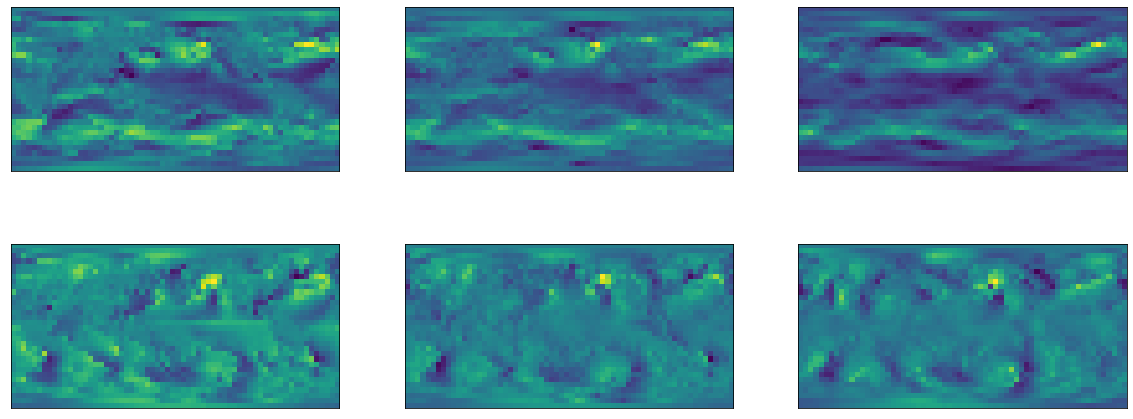

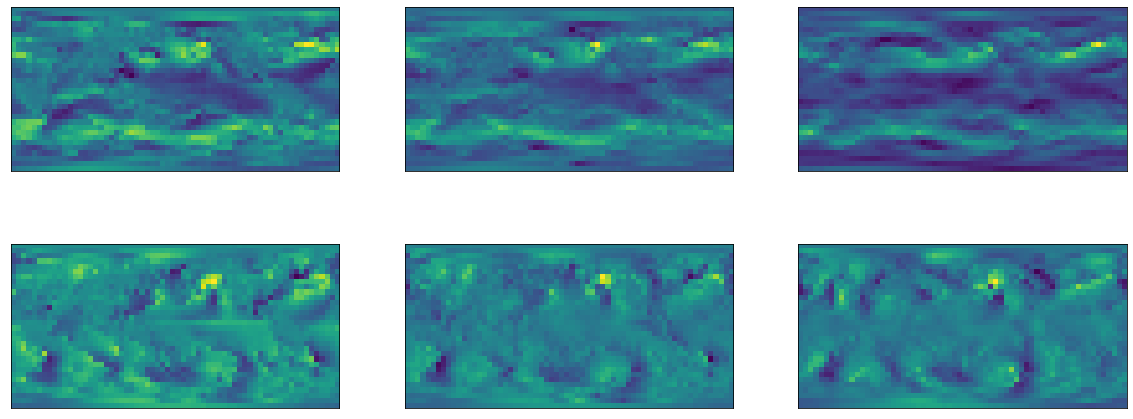

In [62]:
plot(u,v)
plot(u,v)

([], [])

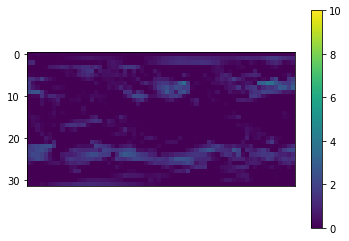

In [71]:
%matplotlib inline
plt.imshow(u[0,0,0].cpu().detach().numpy(),vmin=0,vmax=10)
plt.colorbar()
plt.xticks([])

In [53]:
def ff(x):
    print(np.unravel_index(torch.argmax(x).item(),x.shape))
    print(torch.max(x).item())

In [54]:
ff(u[0,0,0])

(7, 57)
3.8038713932037354


In [39]:
ff(u)
ff(Field_dx)
ff(v)
ff(Field_dy)

(0, 0, 2, 7, 58)
5.6673102378845215
(0, 1, 2, 10, 7)
3.7096304893493652
(0, 0, 2, 7, 38)
5.325535774230957
(0, 0, 2, 6, 58)
4.028587341308594


In [16]:
xydirection  = - u*Field_dx - v*Field_dy

In [43]:
from mltool.visualization import *

In [34]:
u.max()

tensor(19.7845, device='cuda:0', grad_fn=<MaxBackward1>)

In [14]:
for epoch in master_bar:
    data_loader = test_dataloader
    model.eval()
    logsys.eval()
    status     = 'test'
    gpu        = dist.get_rank() if hasattr(model,'module') else 0
    Fethcher   = DataSimfetcher
    prefetcher = Fethcher(data_loader,next(model.parameters()).device)
    batches = len(data_loader)
    inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
    device = next(model.parameters()).device
    data_cost = train_cost = rest_cost = 0
    now = time.time()

    fourcastresult={}
    with torch.no_grad():
        inter_b.lwrite("load everything, start_validating......", end="\r")
        while inter_b.update_step():
            #if inter_b.now>10:break
            data_cost += time.time() - now;now = time.time()
            step = inter_b.now
            idxes,batch = prefetcher.next()
            batch = [x.half() if half_model else x.float() for x in batch]
            batch = [x.to(device) for x in batch]
            channel_last = batch[0].shape[1]!=20 or batch[0].shape[1]!=12
            if channel_last:
                batch = [x.permute(0,3,1,2) for x in batch]# (B, P, W, H ) 

            history_sum_true = history_sum_pred = batch[0].permute(0,2,3,1) if batch[0].shape[1]!=20 or batch[0].shape[1]!=12 else batch[0]
            # first sum should be (B, P, W, H ) 
            accu_series=[]
            rmse_series=[]
            out = batch[0][:1]
            extra_info = {}
            for i in range(1,len(batch)):
                out   = model(out)
                extra_loss = 0
                if isinstance(out,(list,tuple)):
                    extra_loss=out[1]
                    for extra_info_from_model in out[2:]:
                        for key, val in extra_info_from_model.items():
                            if i not in extra_info:extra_info[i] = {}
                            if key not in extra_info[i]:extra_info[i][key] = []
                            extra_info[i][key].append(val)
                    out = out[0]
                #print(out.shape)
                print((out**2).mean(-1).mean(-1))
            break

tensor([[0.8500, 0.9188, 1.0104, 0.8135, 0.7768, 0.7852, 0.9546, 0.8607, 0.9294,
         0.8126, 0.8425, 1.0024]], device='cuda:0')
tensor([[0.8453, 0.9083, 1.0061, 0.8006, 0.7850, 0.8445, 0.9261, 0.8481, 0.9266,
         0.8420, 0.8574, 1.0077]], device='cuda:0')
tensor([[0.8493, 0.8791, 1.0064, 0.7818, 0.7940, 0.8882, 0.9152, 0.8551, 0.9388,
         0.8411, 0.8655, 1.0150]], device='cuda:0')
tensor([[0.8954, 0.9854, 1.0616, 0.8114, 0.9563, 1.0451, 0.9225, 0.8784, 0.9886,
         0.8588, 0.8772, 1.0403]], device='cuda:0')
tensor([[1.2081, 1.6898, 1.4853, 1.2000, 4.7171, 6.2473, 1.6857, 4.1851, 2.3068,
         0.9882, 1.7814, 1.7530]], device='cuda:0')
tensor([[  19.7471,  262.5499,  156.9529,   27.1571, 5849.4805, 7478.5303,
          112.4353, 4165.7866,  928.5605,   11.4273, 1340.9023,  719.9882]],
       device='cuda:0')
tensor([[2.6629e+04, 2.3227e+08, 3.1837e+08, 4.4531e+04, 7.5454e+09, 2.2867e+10,
         1.5145e+06, 2.6487e+09, 2.6776e+09, 7.4702e+04, 1.0834e+09, 1.9604e+0

In [6]:
#                 ltmv_pred = out.permute(0,2,3,1)# (B, P, W, H ) -> # (B, W, H, P) 
#                 ltmv_true = batch[i].permute(0,2,3,1)# (B, P, W, H ) -> # (B, W, H, P) 
#                 history_sum_pred+=ltmv_pred
#                 history_sum_true+=ltmv_true
#                 history_mean_pred=history_sum_pred/(i+1)
#                 history_mean_true=history_sum_true/(i+1)
#                 ltmsv_pred = ltmv_pred - history_mean_pred
#                 ltmsv_true = ltmv_true - history_mean_true
#                 accu_series.append(compute_accu(ltmsv_pred, ltmsv_true).detach().cpu())
#                 rmse_series.append(compute_rmse(ltmv_pred , ltmv_true ).detach().cpu())
#             accu_series = torch.stack(accu_series,1) # (B,fourcast_num,20)
#             rmse_series = torch.stack(rmse_series,1) # (B,fourcast_num,20)
#             for idx, accu,rmse in zip(idxes,accu_series,rmse_series):
#                 #if idx in fourcastresult:logsys.info(f"repeat at idx={idx}")
#                 fourcastresult[idx.item()] = {'accu':accu,"rmse":rmse}
#         for idx, val_pool in extra_info.items():
#             for key, val in val_pool.items():
#                 logsys.record(f'test_{key}_each_fourcast_step', np.mean(val), idx)

#             train_cost += time.time() - now;now = time.time()
#             for _ in range(random_repeat):
#                 out = batch[0]*(1 + torch.randn_like(batch[0])*0.05)
#                 for i in range(1,len(batch)):
#                     out   = model(out)
#                     ltmv_pred = out.permute(0,2,3,1)
#                     ltmv_true = batch[i].permute(0,2,3,1)
#                     history_sum_pred+=ltmv_pred
#                     history_sum_true+=ltmv_true
#                     history_mean_pred=history_sum_pred/(i+1)
#                     history_mean_true=history_sum_true/(i+1)
#                     ltmsv_pred = ltmv_pred - history_mean_pred
#                     ltmsv_true = ltmv_true - history_mean_true
#                     accu_series.append(compute_accu(ltmsv_pred, ltmsv_true).detach().cpu())
#                     rmse_series.append(compute_rmse(ltmv_pred , ltmv_true ).detach().cpu())
#                 accu_series = torch.stack(accu_series,1) # (B,fourcast_num,20)
#                 rmse_series = torch.stack(rmse_series,1) # (B,fourcast_num,20)
#                 for idx, accu,rmse in zip(idxes,accu_series,rmse_series):
#                     if 'random' in fourcastresult[idx.item()]:fourcastresult[idx.item()]['random']={'accu':[],"rmse":[]}
#                     fourcastresult[idx.item()]['random']['accu'].append(accu)
#                     fourcastresult[idx.item()]['random']['rmse'].append(rmse)
#             rest_cost += time.time() - now;now = time.time()
#             if (step+1) % intervel==0 or step==0:
#                 outstring=(f"epoch:valid iter:[{step:5d}]/[{len(data_loader)}] GPU:[{gpu}] cost:[Date]:{data_cost/intervel:.1e} [Train]:{train_cost/intervel:.1e} [Rest]:{rest_cost/intervel:.1e}")
#                 inter_b.lwrite(outstring, end="\r")

2022-08-15 18:52:23,623 use dataset ==> ERA5CephSmallDataset
2022-08-15 18:52:23,625 starting fourcast~!


tensor(0.9545, device='cuda:0')ng......
tensor(0.9579, device='cuda:0')
tensor(1.3089, device='cuda:0')
tensor(2566.3066, device='cuda:0')
tensor(2.2996e+11, device='cuda:0')
tensor(6.4156e+27, device='cuda:0')
tensor(inf, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(0.9479, device='cuda:0')
tensor(0.9476, device='cuda:0')
tensor(0.9950, device='cuda:0')
tensor(65.8099, device='cuda:0')
tensor(3.2256e+08, device='cuda:0')
tensor(1.4953e+22, device='cuda:0')



KeyboardInterrupt



In [ ]:
run_fourcast(args, model,logsys)

In [ ]:
def main(args=None):
    import os
    if args is None:
        args = get_args()
    ngpus = ngpus_per_node = torch.cuda.device_count()
    args.world_size = -1
    args.dist_file  = None
    args.rank       = 0
    args.dist_backend = "nccl"
    args.multiprocessing_distributed = ngpus>1
    if not hasattr(args,'train_set'):args.train_set='large'
    ip = os.environ.get("MASTER_ADDR", "127.0.0.1")
    port = os.environ.get("MASTER_PORT", "54247")
    hosts = int(os.environ.get("WORLD_SIZE", "1"))  # number of nodes
    rank = int(os.environ.get("RANK", "0"))  # node id
    gpus = torch.cuda.device_count()  # gpus per node
    args.dist_url = f"tcp://{ip}:{port}"
    if args.world_size == -1 and "SLURM_NPROCS" in os.environ:
        args.world_size = int(os.environ["SLURM_NPROCS"])
        args.rank       = int(os.environ["SLURM_PROCID"])
        jobid           = os.environ["SLURM_JOBID"]

        hostfile        = "dist_url." + jobid  + ".txt"
        if args.dist_file is not None:
            args.dist_url = "file://{}.{}".format(os.path.realpath(args.dist_file), jobid)
        elif args.rank == 0:
            import socket
            ip = socket.gethostbyname(socket.gethostname())
            port = find_free_port()
            args.dist_url = "tcp://{}:{}".format(ip, port)
            #with open(hostfile, "w") as f:f.write(args.dist_url)
        else:
            import os
            import time
            while not os.path.exists(hostfile):
                time.sleep(1)
            with open(hostfile, "r") as f:
                args.dist_url = f.read()
        print("dist-url:{} at PROCID {} / {}".format(args.dist_url, args.rank, args.world_size))
    else:
        args.world_size = 1
    args.distributed = args.world_size > 1 or args.multiprocessing_distributed
    train_dataset_tensor=valid_dataset_tensor=None

    print("======== loading data ==========")
    if 'small' in args.train_set:
        if not args.fourcast:
            train_dataset_tensor = load_small_dataset_in_memory('train').share_memory_()
            print(f"train->{train_dataset_tensor.shape}")
            valid_dataset_tensor = load_small_dataset_in_memory('valid').share_memory_()
            print(f"valid->{train_dataset_tensor.shape}")
        else:
            train_dataset_tensor = load_small_dataset_in_memory('test').share_memory_()
            print(f"test->{train_dataset_tensor.shape}")
            valid_dataset_tensor = None
    else:
        if args.fourcast:
            train_dataset_tensor = load_test_dataset_in_memory(years=[2018],
                                                               root="datasets/era5G32x64_new"
                                                               ).share_memory_()
            print(f"test->{train_dataset_tensor.shape}")
            valid_dataset_tensor = None
    print("=======done==========")

    if args.multiprocessing_distributed:
        print("======== entering  multiprocessing train ==========")
        args.world_size = ngpus_per_node * args.world_size
        torch.multiprocessing.spawn(main_worker, nprocs=ngpus_per_node, args=(ngpus_per_node, args,train_dataset_tensor,valid_dataset_tensor))
    else:
        print("======== entering  single gpu train ==========")
        main_worker(0, ngpus_per_node, args,train_dataset_tensor,valid_dataset_tensor)

